# Can you afford a house? Let me guide you!
## Mini project source codes 
> Tutorial Group: B22, Group B, Team 14  
> Group members : O Kah hao (U2022308E), Yong Zane (U2020123B)


### Importing relevant libraries 

In [1]:
# Importing all the required Basic libraries for Data Analysis
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

### Importing relevant datasets 


In [2]:
CSV_file = "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
resaleData = pd.read_csv(CSV_file)
resaleData.head() # Check whether we import the correct data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:
resaleData.info() # Checking the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120824 entries, 0 to 120823
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                120824 non-null  object 
 1   town                 120824 non-null  object 
 2   flat_type            120824 non-null  object 
 3   block                120824 non-null  object 
 4   street_name          120824 non-null  object 
 5   storey_range         120824 non-null  object 
 6   floor_area_sqm       120824 non-null  float64
 7   flat_model           120824 non-null  object 
 8   lease_commence_date  120824 non-null  int64  
 9   remaining_lease      120824 non-null  object 
 10  resale_price         120824 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.1+ MB


### Selecting the right variables

Based on a general analysis, we have determined that the variables that we like to study and that are of interest to us are month, town, flat_type, floor_area_sqm, remaining_lease, resale_price 

In [4]:
# Extracting interesting variables
trial = pd.DataFrame(resaleData[['month','town','flat_type','floor_area_sqm','flat_model','remaining_lease','resale_price']])
trial.head()

,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,44.0,Improved,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,67.0,New Generation,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,67.0,New Generation,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,68.0,New Generation,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,67.0,New Generation,62 years 05 months,265000.0


### Manipulating the dataset of interest 

This segment will be using codes to do the following: 

    1) Changing the dtype of the variables
    
This is done so that we can use the appropriate plots, graphs and analysis to determine to draw our conclusion. 

    2) Data manipulation and cleaning
    
In this phase, we will be converting remaining_lease from a catergory type to a float type by manipulation and stored in a new variable called totalMonths. Data cleaning will be done by removing remaining_lease and variables created used in the computation of totalMonths

In [5]:
# Converting dtypes of the variables
trial['month'] = trial['month'].astype('category')
trial['town'] = trial['town'].astype('category')
trial['flat_type'] = trial['flat_type'].astype('category')
trial['flat_model'] = trial['flat_model'].astype('category')
trial['remaining_lease'] = trial['remaining_lease'].astype('category')      # Change them to categorical data
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120824 entries, 0 to 120823
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   month            120824 non-null  category
 1   town             120824 non-null  category
 2   flat_type        120824 non-null  category
 3   floor_area_sqm   120824 non-null  float64 
 4   flat_model       120824 non-null  category
 5   remaining_lease  120824 non-null  category
 6   resale_price     120824 non-null  float64 
dtypes: category(5), float64(2)
memory usage: 2.6 MB


In [6]:
# Converting remaining lease to totalMonths to study any correlation 

# Split remaining_lease into 2 variables: temp_Months and temp_Years 
trial['temp_Years'] = trial['remaining_lease'].str[0:2]
trial['temp_Months'] = trial['remaining_lease'].str[8:]

# Remove "month/months" from the entire 'temp_Months' variables and store as
#as a new variable: 'temp_Months1'
trial['temp_Months1'] = trial['temp_Months'].str.strip("months|month")
#temp_Months dropped to reduce confusion
trial = trial.drop(['temp_Months'],axis = 1) 

# Convert string type to numeric type and replaces NaN with 0
trial['temp_Months1'] = pd.to_numeric(trial['temp_Months1'],errors = 'coerce')
trial = trial.replace(np.nan, 0, regex = True)

# Convert dtypes of temp_Years and temp_Months1
trial['temp_Years'] = trial['temp_Years'].astype('float64')
trial['temp_Months1'] = trial['temp_Months1'].astype('float64')

# Find the totalMonths by summation of temp_Years and temp_Months1
trial['totalMonths'] = trial.temp_Years * 12 + trial.temp_Months1                 # Maths

# Store cleaned dataframe into new dataframe 
resaleHouseData = pd.DataFrame(trial)
#'temp_Years' and 'temp_Months1' dropped to reduce confusion 
resaleHouseData = resaleHouseData.drop(['temp_Years','temp_Months1'], axis = 1)
resaleHouseData

,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,totalMonths
0,2017-01,ANG MO KIO,2 ROOM,44.0,Improved,61 years 04 months,232000.0,736.0
1,2017-01,ANG MO KIO,3 ROOM,67.0,New Generation,60 years 07 months,250000.0,727.0
2,2017-01,ANG MO KIO,3 ROOM,67.0,New Generation,62 years 05 months,262000.0,749.0
3,2017-01,ANG MO KIO,3 ROOM,68.0,New Generation,62 years 01 month,265000.0,745.0
4,2017-01,ANG MO KIO,3 ROOM,67.0,New Generation,62 years 05 months,265000.0,749.0
...,...,...,...,...,...,...,...,...
120819,2022-02,YISHUN,EXECUTIVE,187.0,Apartment,69 years 04 months,1038000.0,832.0
120820,2022-02,YISHUN,EXECUTIVE,142.0,Apartment,65 years 05 months,680000.0,785.0
120821,2022-02,YISHUN,EXECUTIVE,146.0,Maisonette,64 years 11 months,800000.0,779.0
120822,2022-02,YISHUN,MULTI-GENERATION,171.0,Multi Generation,64 years 11 months,842000.0,779.0


### Town selection and filter

To identify the town of interest to the user, 

    1) Distribution of resale flats sold in all towns of Singapore is shown 
    
    This is to give the user the ability to determine where would they most likely to be able to find a house in Singapore 
    
    2) townFilter: To look at town of interest. 
    
    The town of interest is inserted here which would be filtered from the data in the dataset.

In [7]:
#This is to show the number of resale flats available in the town which would
#give the cilent a rough estimate of where is he/she is most likely to be able
#to find a house. 

print("Town in Singapore :", len(resaleData["town"].unique()))                 # How many Singapore town in this Data Set?
print(resaleData["town"].value_counts())

Town in Singapore : 26
SENGKANG           10252
PUNGGOL             8831
WOODLANDS           8266
TAMPINES            8210
JURONG WEST         8134
YISHUN              8072
BEDOK               6570
HOUGANG             5932
CHOA CHU KANG       5424
ANG MO KIO          5118
BUKIT PANJANG       4730
BUKIT MERAH         4696
BUKIT BATOK         4022
TOA PAYOH           3881
PASIR RIS           3780
KALLANG/WHAMPOA     3505
QUEENSTOWN          3480
GEYLANG             2975
SEMBAWANG           2817
CLEMENTI            2758
JURONG EAST         2590
BISHAN              2356
SERANGOON           2340
CENTRAL AREA        1009
MARINE PARADE        747
BUKIT TIMAH          329
Name: town, dtype: int64


In [8]:
# Creating townFilter
townFilter = "GEYLANG"

#Removes the all town except for townFilter
resaleHouseData = resaleHouseData[resaleHouseData["town"].str.contains(townFilter) == True]

#Resets the index of resaleHouseData
resaleHouseData.reset_index(drop = True, inplace = True)

resaleHouseCData = pd.DataFrame(resaleHouseData)

print(resaleHouseCData .info())
resaleHouseCData 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   month            2975 non-null   category
 1   town             2975 non-null   category
 2   flat_type        2975 non-null   category
 3   floor_area_sqm   2975 non-null   float64 
 4   flat_model       2975 non-null   category
 5   remaining_lease  2975 non-null   category
 6   resale_price     2975 non-null   float64 
 7   totalMonths      2975 non-null   float64 
dtypes: category(5), float64(3)
memory usage: 113.3 KB
None


,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,totalMonths
0,2017-01,GEYLANG,2 ROOM,42.0,Standard,53 years,205000.0,636.0
1,2017-01,GEYLANG,2 ROOM,42.0,Standard,53 years,215000.0,636.0
2,2017-01,GEYLANG,2 ROOM,46.0,Standard,55 years 06 months,220000.0,666.0
3,2017-01,GEYLANG,3 ROOM,60.0,Standard,49 years,230000.0,588.0
4,2017-01,GEYLANG,3 ROOM,60.0,Standard,49 years,235000.0,588.0
...,...,...,...,...,...,...,...,...
2970,2022-02,GEYLANG,5 ROOM,127.0,Improved,74 years 06 months,760000.0,894.0
2971,2022-02,GEYLANG,5 ROOM,140.0,Model A-Maisonette,60 years 09 months,880000.0,729.0
2972,2022-02,GEYLANG,5 ROOM,121.0,Improved,74 years 11 months,855000.0,899.0
2973,2022-02,GEYLANG,EXECUTIVE,145.0,Apartment,64 years 03 months,965000.0,771.0


In [9]:
resaleHouseCData.describe()

,floor_area_sqm,resale_price,totalMonths
count,2975.000000,2.975000e+03,2975.000000
mean,84.159832,4.524337e+05,770.242017
std,26.168498,2.005626e+05,164.277700
min,40.000000,1.466670e+05,528.000000
25%,60.300000,2.782500e+05,652.000000
50%,84.000000,4.000000e+05,743.000000
75%,101.000000,6.250000e+05,822.000000
max,160.000000,1.020000e+06,1145.000000


### Creating cat plots

    1) Month
    2) Town
    3) Flat_type
    4) Flat_model

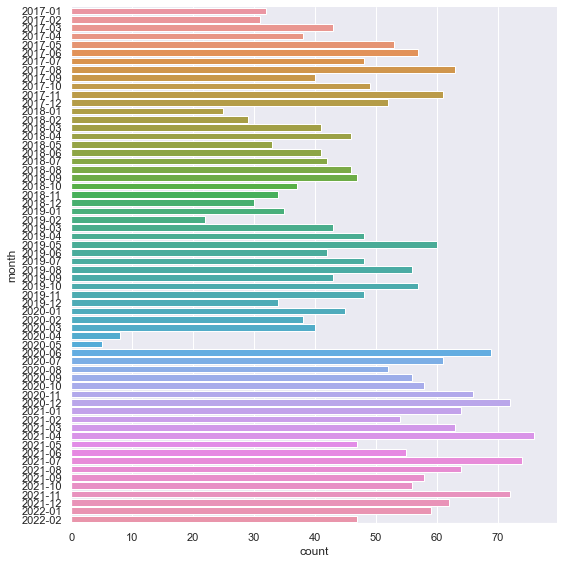

In [10]:
# Shows the distribution of flat sales in every month from 2017 - 2022
sb.catplot( data = resaleHouseCData, y = 'month' , kind = "count", height = 8)       # Buy and sale 

3 ROOM              1311
4 ROOM              1059
5 ROOM               383
EXECUTIVE            125
2 ROOM                97
1 ROOM                 0
MULTI-GENERATION       0
Name: flat_type, dtype: int64


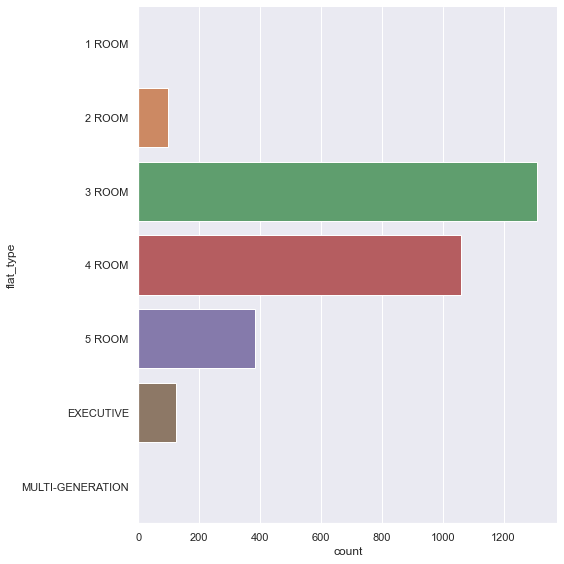

In [11]:
# Shows the flat type that number of flat type avaialble in the town of interest
print(resaleHouseCData["flat_type"].dropna().value_counts())
sb.catplot(y = 'flat_type', data = resaleHouseCData , kind = "count", height = 8)

Model A                   737
Improved                  685
Standard                  682
New Generation            426
Simplified                266
Maisonette                 96
Model A-Maisonette         38
Apartment                  29
Adjoined flat              15
2-room                      1
Premium Maisonette          0
Type S1                     0
Terrace                     0
Multi Generation            0
Premium Apartment Loft      0
Premium Apartment           0
Model A2                    0
Improved-Maisonette         0
DBSS                        0
Type S2                     0
Name: flat_model, dtype: int64


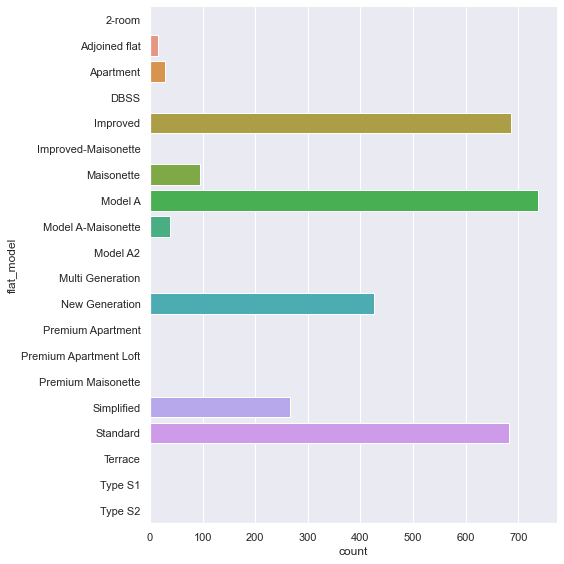

In [12]:
# Shows the distribution of flat model in the town of interest 
print(resaleHouseCData["flat_model"].dropna().value_counts())
sb.catplot(y = 'flat_model', data = resaleHouseCData , kind = "count", height = 8)

<AxesSubplot:xlabel='flat_type', ylabel='flat_model'>

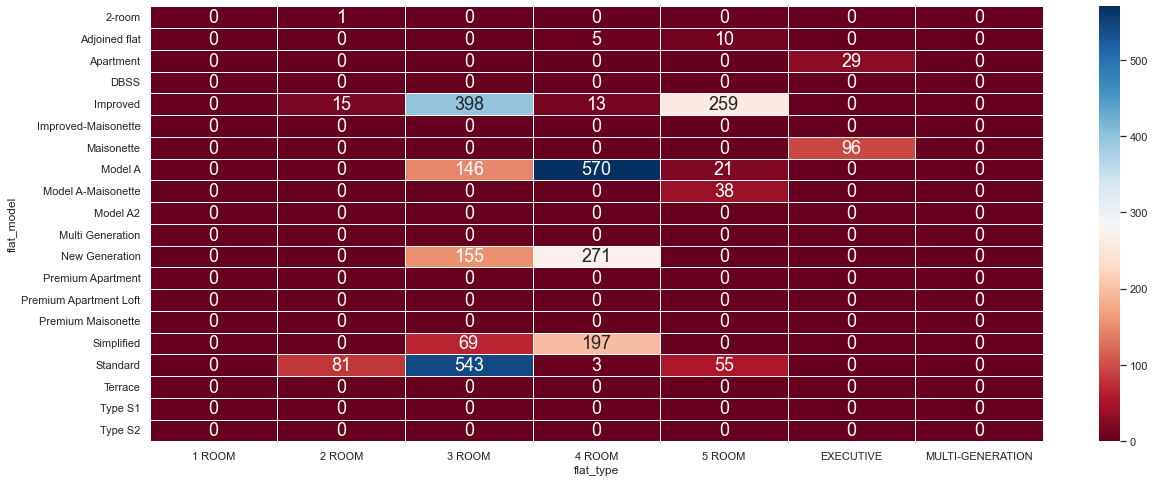

In [13]:
# heatmap of flat_type and flat_model to determine distribution which could influence choice of house. 
plt.figure(figsize=(20, 8))
sb.heatmap(resaleHouseCData .groupby(['flat_model','flat_type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "RdBu")  # Conclusion of the 2 cells above 

### Identifying the relationship between resale price and flat type 

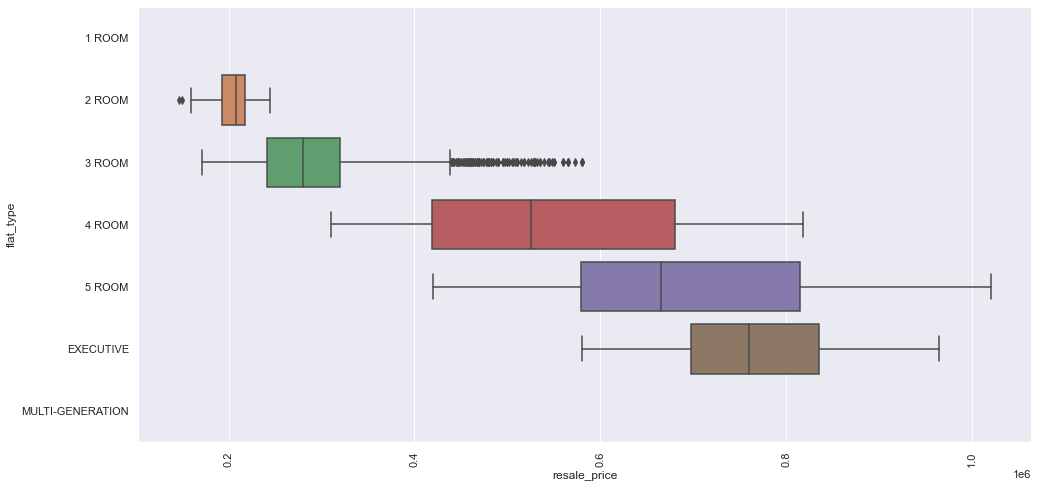

In [14]:
# Relation between flat type and resale price
plt.figure(figsize=(16, 8))
sb.boxplot(x = 'resale_price', y = 'flat_type', data = resaleHouseCData)
plt.xticks(rotation=90);

### Investigating the resale price for each flat type. 

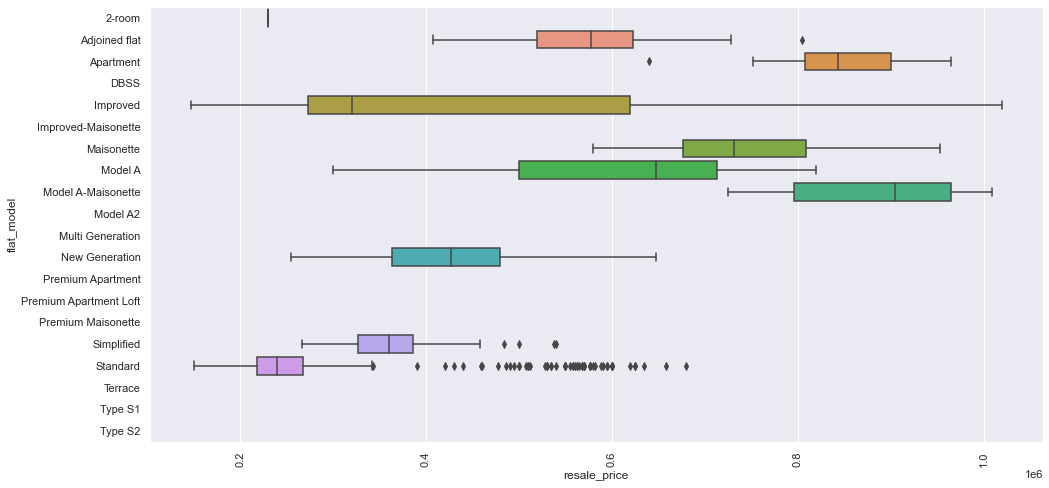

In [15]:
# Relation between flat model and resale price

plt.figure(figsize=(16, 8))
sb.boxplot(x = 'resale_price', y = 'flat_model', data = resaleHouseCData)
plt.xticks(rotation=90);

### Investigating floor area for each flat type


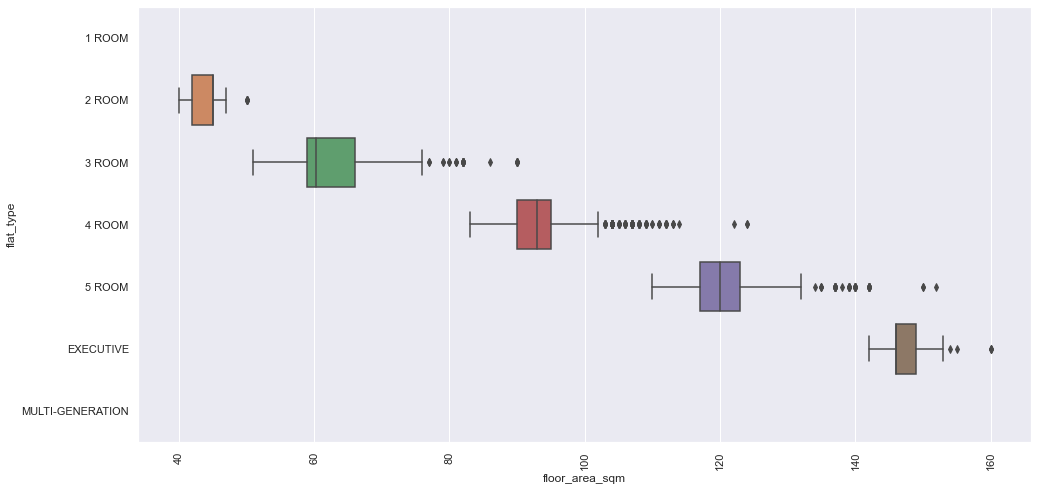

In [16]:
plt.figure(figsize=(16, 8))
sb.boxplot(x = 'floor_area_sqm', y = 'flat_type', data = resaleHouseCData)
plt.xticks(rotation=90);

In [17]:
# Give basic analysis of resale price filtered by flat_type from above
flatType_1Room = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("1 ROOM") == True]
flatType_2Room = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("2 ROOM") == True]
flatType_3Room = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("3 ROOM") == True]
flatType_4Room = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("4 ROOM") == True]
flatType_5Room = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("5 ROOM") == True]
flatType_Executive = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("EXECUTIVE") == True]
flatType_MultiGen = resaleHouseCData[resaleHouseCData['flat_type'].str.contains("MULTI-GENERATION") == True]

flatType_1Room.describe(),flatType_2Room.describe(),flatType_3Room.describe(),flatType_4Room.describe(),flatType_5Room.describe(),flatType_Executive.describe(),flatType_MultiGen.describe()

(       floor_area_sqm  resale_price  totalMonths
 count             0.0           0.0          0.0
 mean              NaN           NaN          NaN
 std               NaN           NaN          NaN
 min               NaN           NaN          NaN
 25%               NaN           NaN          NaN
 50%               NaN           NaN          NaN
 75%               NaN           NaN          NaN
 max               NaN           NaN          NaN,
        floor_area_sqm   resale_price  totalMonths
 count       97.000000      97.000000    97.000000
 mean        44.206186  203918.092784   622.969072
 std          2.461953   20003.209295    67.251309
 min         40.000000  146667.000000   545.000000
 25%         42.000000  192500.000000   582.000000
 50%         45.000000  208000.000000   602.000000
 75%         45.000000  218000.000000   631.000000
 max         50.000000  245000.000000   812.000000,
        floor_area_sqm   resale_price  totalMonths
 count     1311.000000    1311.000000 

### Investigating the relationship between floor_area_sqm, totalMonths and resale_price

<AxesSubplot:xlabel='totalMonths'>

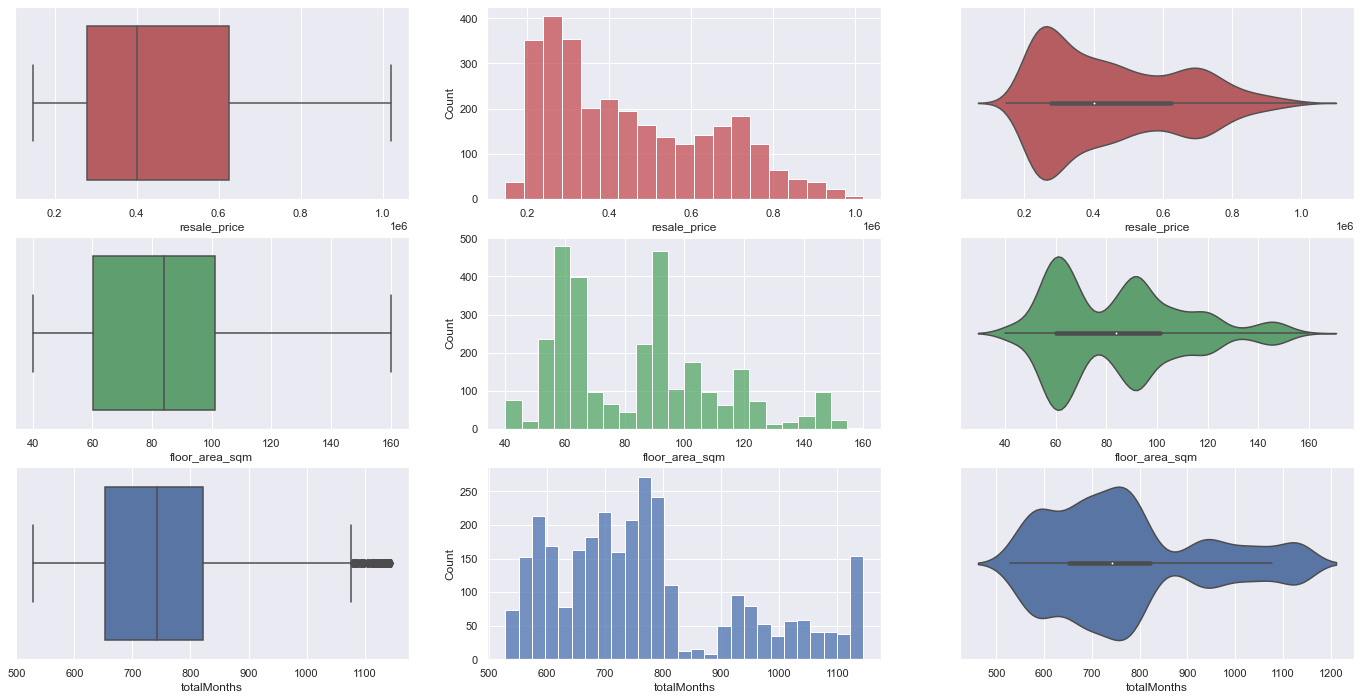

In [18]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12)) #Preparing a figure (x) of  size 24 by 12 with 2 rows and 3 columns
colors = ["r","g","b"]
count = 0

sb.boxplot(x = 'resale_price', data=resaleHouseCData, color = colors[count] ,orient = "h" , ax = axes[0,0]) # at positioning row 0, column 0 of x
sb.histplot(x = 'resale_price' , data=resaleHouseCData, color = colors[count], ax = axes[0,1]) # at positioning row 0, column 1 of x
sb.violinplot(x = 'resale_price' ,data=resaleHouseCData, color = colors[count], orient = "h",ax = axes[0,2])
count += 1

sb.boxplot(x = 'floor_area_sqm', data=resaleHouseCData, color = colors[count] ,orient = "h" , ax = axes[1,0]) # at positioning row 0, column 0 of x
sb.histplot(x = 'floor_area_sqm' , data=resaleHouseCData, color = colors[count], ax = axes[1,1]) # at positioning row 0, column 1 of x
sb.violinplot(x = 'floor_area_sqm' ,data=resaleHouseCData, color = colors[count], orient = "h",ax = axes[1,2])
count += 1

sb.boxplot(x = 'totalMonths', data=resaleHouseCData, color = colors[count] ,orient = "h" , ax = axes[2,0]) # at positioning row 0, column 0 of x
sb.histplot(x = 'totalMonths' , data=resaleHouseCData, color = colors[count], ax = axes[2,1]) # at positioning row 0, column 1 of x
sb.violinplot(x = 'totalMonths' ,data=resaleHouseCData, color = colors[count], orient = "h",ax = axes[2,2])



The pairplot below will show the relationship between resale_price, totalMonths, and floor_area_sqm. 

Based on visual anaylsis of pairplot, we can see if any of the variables are linearly related and then focus on them for analysis. 

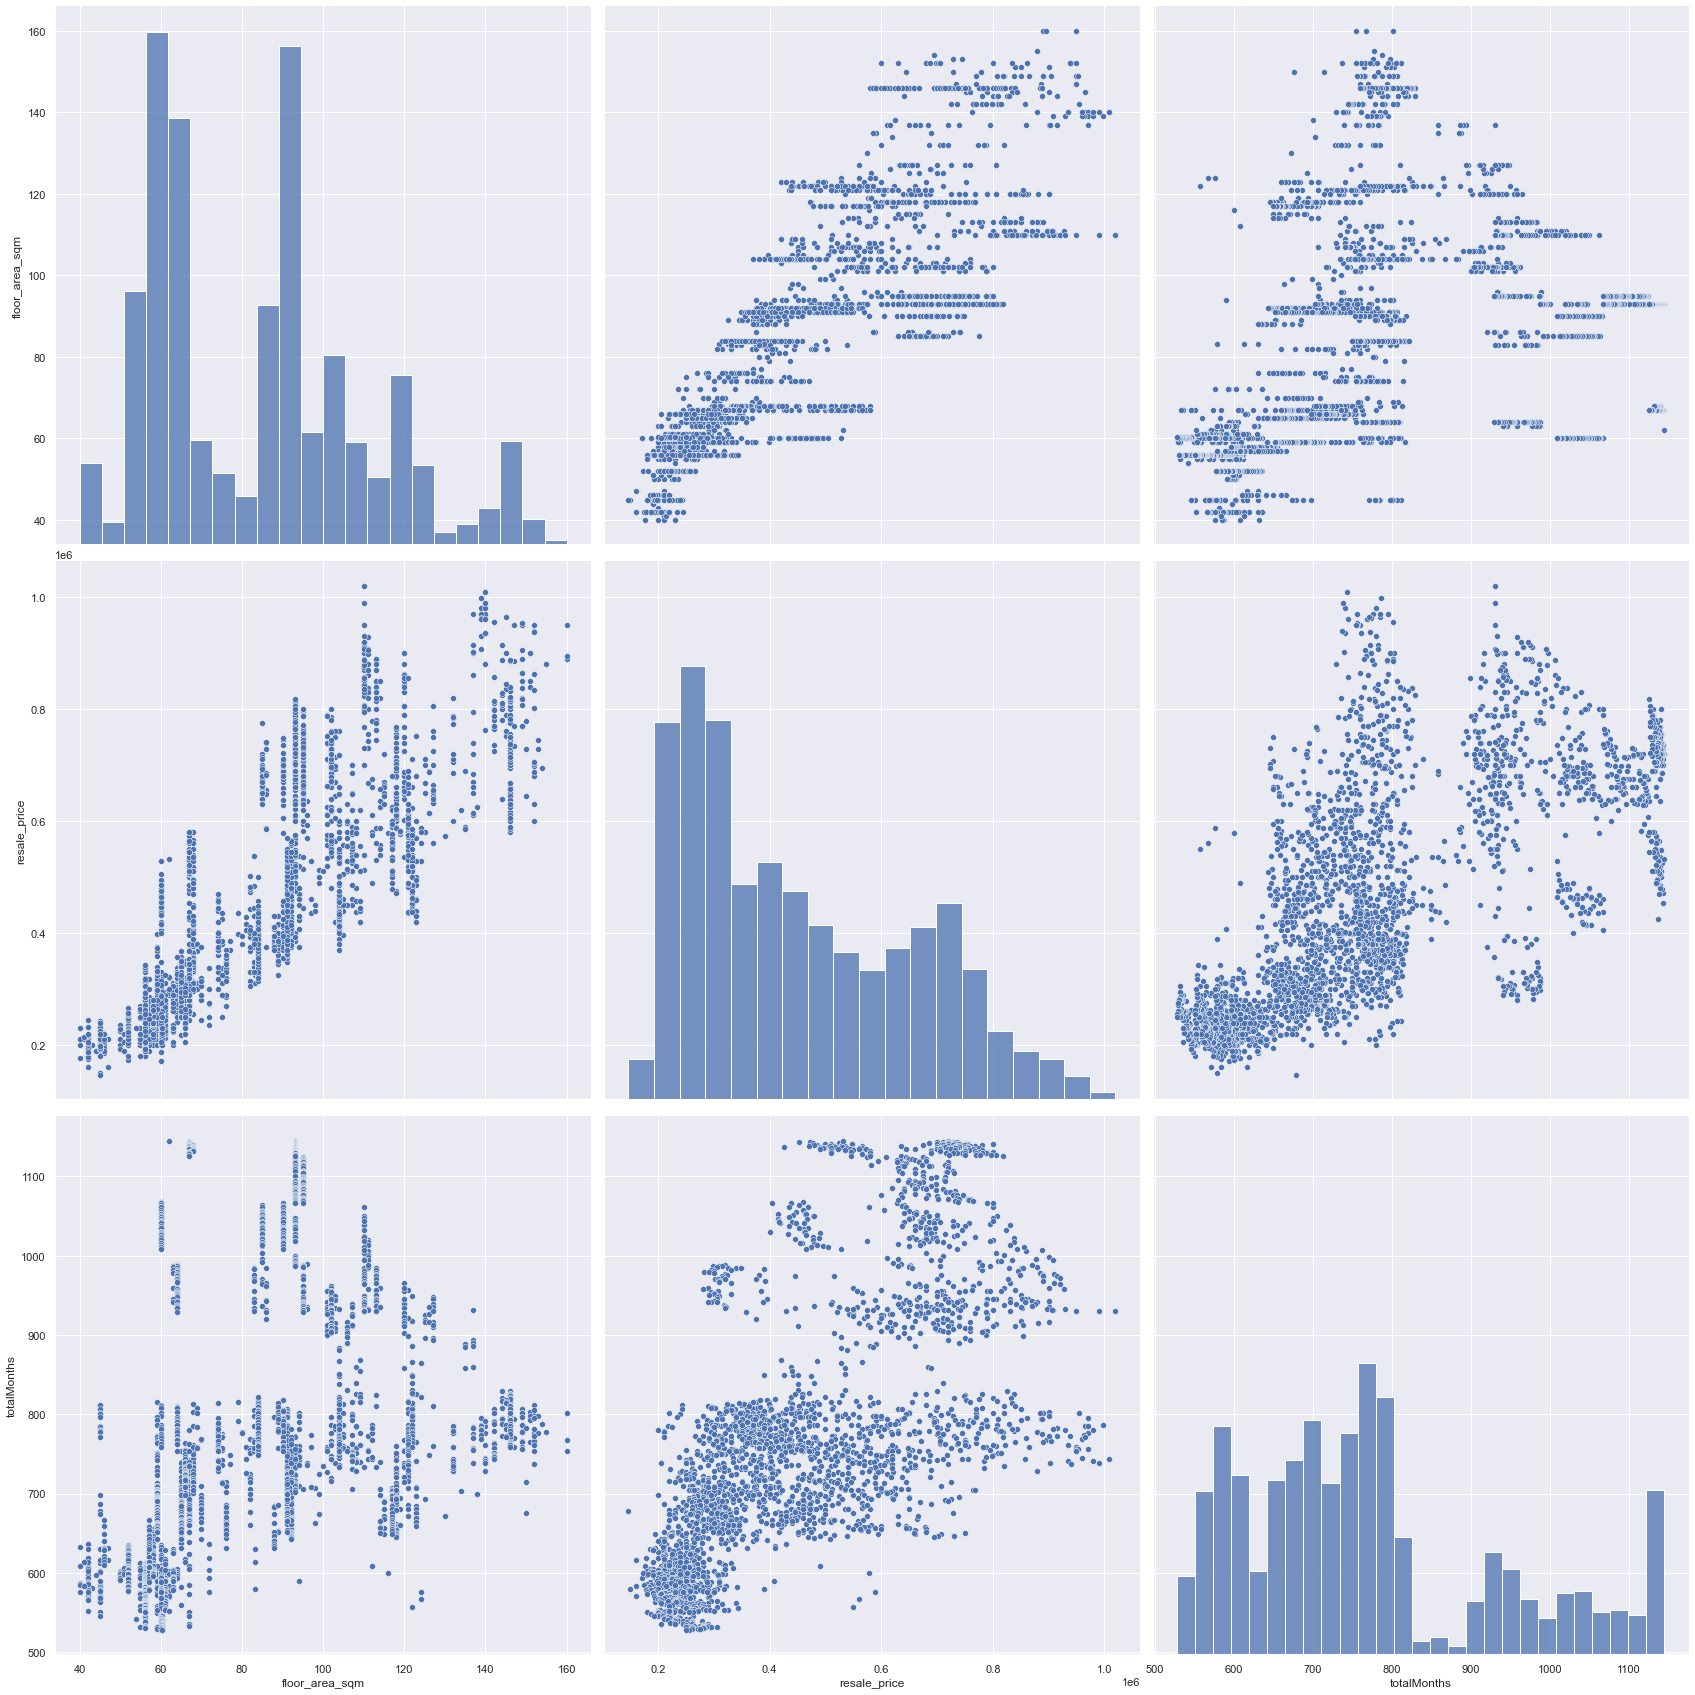

In [19]:
sb.pairplot(data=resaleHouseCData, height = 8)

### Creating a joint dataframe for the 3 float type variables 

Using the joint dataframe of the 3 variables of interest, their covariance will be checked to give a numerical representation of their relationship with one another which can indicate if it will be good to include that variable for further investigation. 

In [20]:
resaleDataJoint = pd.DataFrame(resaleHouseCData[['resale_price','floor_area_sqm','totalMonths']])
resaleDataJoint

,resale_price,floor_area_sqm,totalMonths
0,205000.0,42.0,636.0
1,215000.0,42.0,636.0
2,220000.0,46.0,666.0
3,230000.0,60.0,588.0
4,235000.0,60.0,588.0
...,...,...,...
2970,760000.0,127.0,894.0
2971,880000.0,140.0,729.0
2972,855000.0,121.0,899.0
2973,965000.0,145.0,771.0


                resale_price  floor_area_sqm  totalMonths
resale_price        1.000000        0.831709     0.682530
floor_area_sqm      0.831709        1.000000     0.379192
totalMonths         0.682530        0.379192     1.000000


<AxesSubplot:>

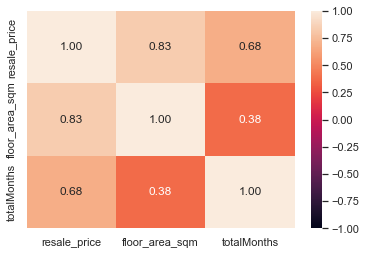

In [21]:
# Calculate the correlation index between the 2 variables
CRI = resaleDataJoint.corr()
print(CRI)
sb.heatmap(CRI, vmin = -1, vmax = 1, annot = True, fmt=".2f")    # Since it has high correlation, we will use both numeric data

Based on the covariance score above, we see that there is high covariance (covariance > 0.6) between resale_price and two other variables: floor_area_sqm and totalMonths. 

### Multivariate linear regression - predicting future prices 

A linear regression model will be used to predict the sale prices for the following years 

    - The predictor for the regression model are: 'totalMonths' and 'floor_area_sqm' 
    - The response for the regression model is: 'resale_price'
    - The regression model will use data that is based on all the years from available as means to train the model 
    - The regression model will be unique to the town of interest within the townFilter

Intercept of Regression 	: b =  [-381448.46372771]
Coefficients of Regression 	: a =  [[ 523.0138013  5111.38715502]]

       Predictors  Coefficients
0     totalMonths    523.013801
1  floor_area_sqm   5111.387155



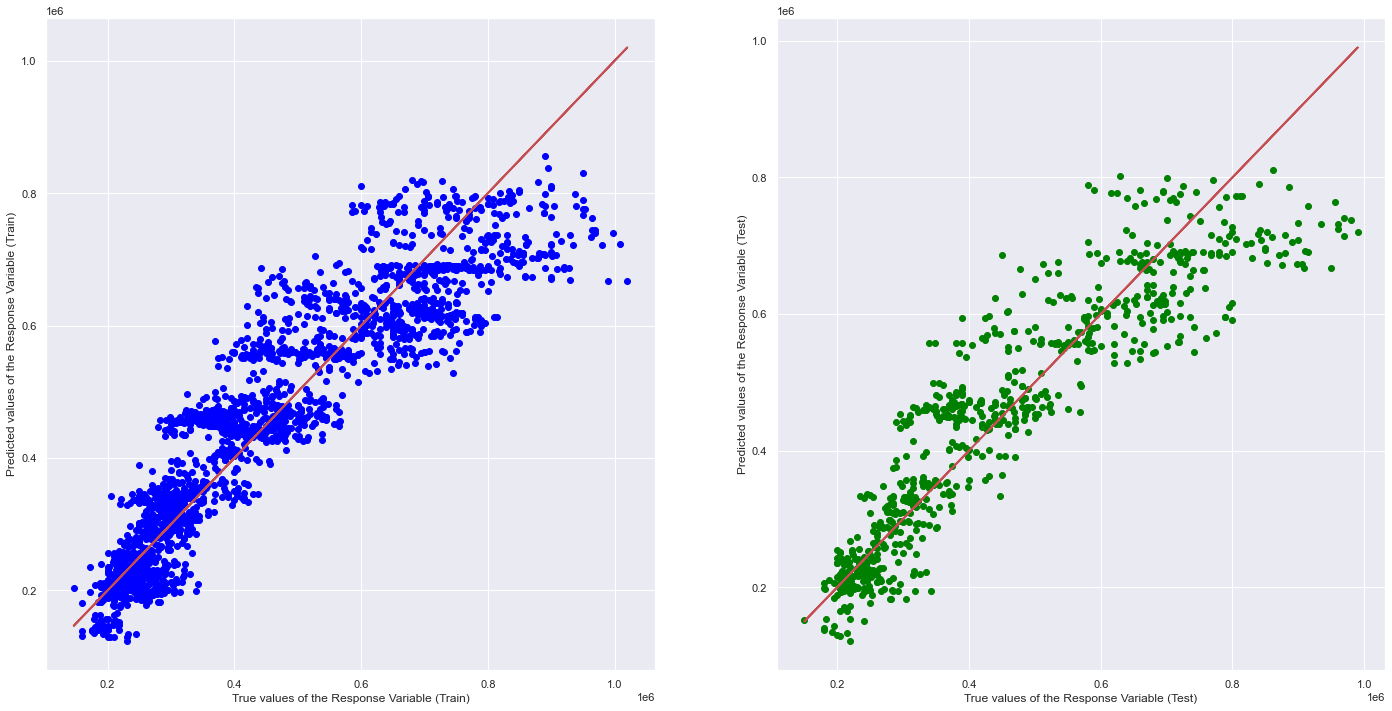

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8537221469832086
Mean Squared Error (MSE) 	: 5901053394.995687

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8352681049824889
Mean Squared Error (MSE) 	: 6559797432.154189



In [22]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["totalMonths", "floor_area_sqm"]                       # we are using these 2 as predictor

y = pd.DataFrame(resaleHouseCData["resale_price"])
X = pd.DataFrame(resaleHouseCData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Regression model - determining usefulness in predicting data 
#### 'resale_price' and 'floor_area_sqm' 

This regression model will be used to test potential house data with inflated prices based on assumptions online that house prices will increase based on the current trend 

Based property expert prediction, resale prices are expected to grow 4% - 8% 

Assumption:

    Property prices grow 4% per year

We will pick 10 data points from the current dataset and apply 4% to that resaleprice to determine the "predicted price" 

In [23]:
resaleHouseCData.head()

,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,totalMonths
0,2017-01,GEYLANG,2 ROOM,42.0,Standard,53 years,205000.0,636.0
1,2017-01,GEYLANG,2 ROOM,42.0,Standard,53 years,215000.0,636.0
2,2017-01,GEYLANG,2 ROOM,46.0,Standard,55 years 06 months,220000.0,666.0
3,2017-01,GEYLANG,3 ROOM,60.0,Standard,49 years,230000.0,588.0
4,2017-01,GEYLANG,3 ROOM,60.0,Standard,49 years,235000.0,588.0


In [24]:
R2_Tables = list()

In [25]:
#Filtering 2021 resale prices 
predictedHouseData = pd.DataFrame(resaleHouseCData[['month','resale_price','floor_area_sqm','totalMonths']])

#Filter for 2021 resale house prices only
yearFilter = "2021"
predictedHouseData = predictedHouseData[predictedHouseData["month"].str.contains(yearFilter) == True]
predictedHouseData.reset_index(drop = True, inplace = True)

predictedHouseData

,month,resale_price,floor_area_sqm,totalMonths
0,2021-01,198000.0,45.0,589.0
1,2021-01,290000.0,65.0,644.0
2,2021-01,280000.0,67.0,703.0
3,2021-01,270000.0,67.0,672.0
4,2021-01,230000.0,60.0,540.0
...,...,...,...,...
740,2021-12,658000.0,114.0,650.0
741,2021-12,950000.0,160.0,754.0
742,2021-12,801000.0,152.0,761.0
743,2021-12,950000.0,152.0,754.0


### Regression line testing - coming up with assumed 2022  data 

To test the regression model, it has to be tested with 2022 data which is not available at the moment. Hence, to simulate 2022 data, an assumption of 4% growth from 2021's resale_price is used to predict 2022's data 

In [26]:
# Selecting data points that will be used to test the regression model from 
# predictedHouseData 

# using train_test_split to randomize the data 
train, test= train_test_split(predictedHouseData, test_size = 0.30, random_state = 15)
test.reset_index(drop = True, inplace = True)

test.shape

(224, 4)

In [27]:
# Predicting resale_price for 2022 to grow 4% from 2021's resale_price
assumedData_2022 = pd.DataFrame(test)
assumedData_2022['resale_price'] = assumedData_2022['resale_price'].multiply(1.04)
assumedData_2022

,month,resale_price,floor_area_sqm,totalMonths
0,2021-12,827840.00,93.0,1127.0
1,2021-03,624000.00,106.0,905.0
2,2021-10,286000.00,60.0,556.0
3,2021-10,456560.00,74.0,759.0
4,2021-09,603200.00,68.0,1132.0
...,...,...,...,...
219,2021-07,586443.52,102.0,747.0
220,2021-09,818480.00,142.0,746.0
221,2021-08,850720.00,146.0,771.0
222,2021-07,468000.00,92.0,649.0


In [28]:
# Predicting resale_price for 2023 to grow 5% from 2022's resale_price
assumedData_2023 = assumedData_2022.copy();
assumedData_2023['resale_price'] = assumedData_2023['resale_price'].multiply(1.05)
assumedData_2023

,month,resale_price,floor_area_sqm,totalMonths
0,2021-12,869232.000,93.0,1127.0
1,2021-03,655200.000,106.0,905.0
2,2021-10,300300.000,60.0,556.0
3,2021-10,479388.000,74.0,759.0
4,2021-09,633360.000,68.0,1132.0
...,...,...,...,...
219,2021-07,615765.696,102.0,747.0
220,2021-09,859404.000,142.0,746.0
221,2021-08,893256.000,146.0,771.0
222,2021-07,491400.000,92.0,649.0


In [29]:
# Prediciting resale_price for 2024 to grow 6% from 2023's resale_price
assumedData_2024 = assumedData_2023.copy()
assumedData_2024['resale_price'] = assumedData_2024['resale_price'].multiply(1.06)
assumedData_2024

,month,resale_price,floor_area_sqm,totalMonths
0,2021-12,921385.92000,93.0,1127.0
1,2021-03,694512.00000,106.0,905.0
2,2021-10,318318.00000,60.0,556.0
3,2021-10,508151.28000,74.0,759.0
4,2021-09,671361.60000,68.0,1132.0
...,...,...,...,...
219,2021-07,652711.63776,102.0,747.0
220,2021-09,910968.24000,142.0,746.0
221,2021-08,946851.36000,146.0,771.0
222,2021-07,520884.00000,92.0,649.0


Intercept of Regression 	: b =  [-381448.46372771]
Coefficients of Regression 	: a =  [[ 523.0138013  5111.38715502]]

       Predictors  Coefficients
0     totalMonths    523.013801
1  floor_area_sqm   5111.387155



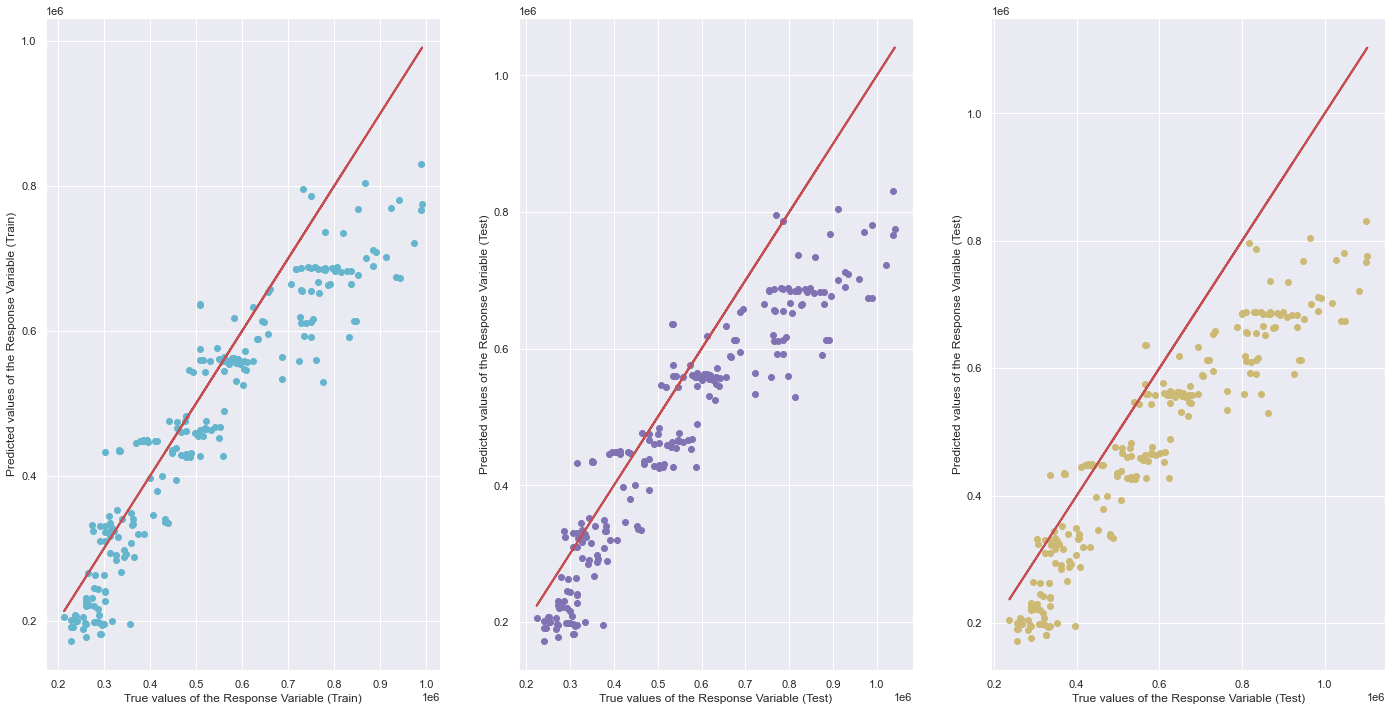

Goodness of Fit of Model 	assumedData_2022 Dataset 
Explained Variance (R^2) 	: 0.8093431256872116
Mean Squared Error (MSE) 	: 8295930057.520462

Goodness of Fit of Model 	assumedData_2023 Dataset
Explained Variance (R^2) 	: 0.7349830759686375
Mean Squared Error (MSE) 	: 12713491007.377268

Goodness of Fit of Model 	assumedData_2024 Dataset
Explained Variance (R^2) 	: 0.619246577591865
Mean Squared Error (MSE) 	: 20523279393.849155



In [30]:
inreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# assumedData_2022
assumedData_2022_x = assumedData_2022[predictors]
assumedData_2022_y = assumedData_2022['resale_price']
#
assumedData_2023_x = assumedData_2023[predictors]
assumedData_2023_y = assumedData_2023['resale_price']

assumedData_2024_x = assumedData_2024[predictors]
assumedData_2024_y = assumedData_2024['resale_price']

# Predict Response corresponding to Predictors
assumedData_2022_predict = linreg.predict(assumedData_2022_x)
assumedData_2023_predict = linreg.predict(assumedData_2023_x)
assumedData_2024_predict = linreg.predict(assumedData_2024_x)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 3, figsize=(24, 12))

axes[0].scatter(assumedData_2022_y, assumedData_2022_predict, color = "c")
axes[0].plot(assumedData_2022_y, assumedData_2022_y, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
#------------------------------------------------------------------------------
axes[1].scatter(assumedData_2023_y, assumedData_2023_predict, color = "m")
axes[1].plot(assumedData_2023_y, assumedData_2023_y, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
#------------------------------------------------------------------------------
axes[2].scatter(assumedData_2024_y, assumedData_2024_predict, color = "y")
axes[2].plot(assumedData_2024_y, assumedData_2024_y, 'r-', linewidth = 2)
axes[2].set_xlabel("True values of the Response Variable (Test)")
axes[2].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on 2022 Data)
print("Goodness of Fit of Model \tassumedData_2022 Dataset ")
print("Explained Variance (R^2) \t:", linreg.score(assumedData_2022_x, assumedData_2022_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(assumedData_2022_y, assumedData_2022_predict))
print()

# Check the Goodness of Fit (on 2023 Data)
print("Goodness of Fit of Model \tassumedData_2023 Dataset")
print("Explained Variance (R^2) \t:", linreg.score(assumedData_2023_x, assumedData_2023_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(assumedData_2023_y, assumedData_2023_predict))
print()

# Check the Goodness of Fit (on 2024 Data)
print("Goodness of Fit of Model \tassumedData_2024 Dataset")
print("Explained Variance (R^2) \t:", linreg.score(assumedData_2024_x, assumedData_2024_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(assumedData_2024_y, assumedData_2024_predict))
print()

### Accuracy between Actual and Predicted Resale Price
We pick one of the data from the specific town we are interested in and test it with our regression model

In [31]:
# Identifying actual 2022 data located in the dataset 
resaleHouseCData_filter = resaleHouseCData[resaleHouseCData["month"].isin(["2022-02"])]
resaleHouseCData_pred = resaleHouseCData_filter.iloc[2:3] # Locating actual 2022 resale data
resaleHouseCData_pred

,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,totalMonths
2930,2022-02,GEYLANG,3 ROOM,67.0,New Generation,55 years,345000.0,660.0


In [32]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(resaleHouseCData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[306203.5845146]])

In [33]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["predicted_resale_price"], index = resaleHouseCData_pred.index)
resaleHouseCData_acc = pd.concat([resaleHouseCData_pred[["town", "resale_price"]], y_pred], axis = 1)

y_errs = 100 * abs(resaleHouseCData_acc["resale_price"] - resaleHouseCData_acc["predicted_resale_price"]) / resaleHouseCData_acc["resale_price"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = resaleHouseCData_pred.index)
resaleHouseCData_acc = pd.concat([resaleHouseCData_acc, y_errs], axis = 1)

resaleHouseCData_acc

,town,resale_price,predicted_resale_price,Error
2930,GEYLANG,345000.0,306203.584515,11.245338
